# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
Data = pd.read_csv('Thyriod.csv')
Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [2]:
Data.shape

(3772, 30)

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
Data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [5]:
#We can check number of missing value that has written by ?.
count = Data['sex'][Data['sex'] == '?'].count()
print("Missing value in age columns is",count)

Missing value in age columns is 150


In [6]:
#check number of columns in 
for col in Data.columns:
    count = Data[col][Data[col] == '?'].count()
    if count != 0:
        print(col,":", Data[col][Data[col] == '?'].count())

age : 1
sex : 150
TSH : 369
T3 : 769
TT4 : 231
T4U : 387
FTI : 385
TBG : 3772


In [7]:
#You can see than TBG have all values are missing. so we remove it.
Data = Data.drop(['TBG'],axis = 1)
Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative


In [8]:
# As you can see, There is pair of column like..TT4 and with measure...!
# so we drop T F column and go for measurement.

In [9]:
Data = Data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)
Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,?,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,?,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,?,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative


In [10]:
for col in Data.columns:
    count = Data[col][Data[col] == '?'].count()
    if count != 0:
        Data[col] = Data[col].replace('?',np.nan)

In [11]:
#finally we convert the dataset ? value into nan.
Data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

# Data Cleaning

In [12]:
Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative


In [13]:
# We seperate convert sex column beacse they have capital word.
Data['sex'] = Data['sex'].map({'F':0,'M':1})
Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative


In [14]:
len(Data['sick'].unique())

2

In [15]:
for col in Data.columns:
    if len(Data[col].unique()) == 2:
        Data[col] = Data[col].map({'f':0,'t':1})
Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [5]:
Data['referral_source'].unique()
#There are 5 unique value. so we use dummie variable.

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Data['referral_source']= label_encoder.fit_transform(Data['referral_source'])
Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,1,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,4,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,4,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,4,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,3,negative


In [18]:
Data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [19]:
#In the output variable. We convert the data into numerical using label
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Data['Class']= label_encoder.fit_transform(Data['Class'])

In [20]:
Data.describe(include = 'all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
count,3771,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3403,3003,3541,3385,3387,3772.000000,3772.000000
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,287,69,241,146,234,NaN,NaN
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.2,2,101,0.99,100,NaN,NaN
freq,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,116,238,71,95,73,NaN,NaN
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.025451,0.000265,0.048780,NaN,NaN,NaN,NaN,NaN,3.279427,0.974814
std,NaN,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.157510,0.016282,0.215437,NaN,NaN,NaN,NaN,NaN,1.092085,0.279508
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000


In [21]:
#compute missing values.
# we also use mean, median and mode.
from sklearn.impute import KNNImputer
Imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=Imputer.fit_transform(Data)
cleandata=pd.DataFrame(data=np.round(new_array), columns=Data.columns)

In [22]:
cleandata.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
Class                        0
dtype: int64

# Analyse data.

### Bar plot for categorical variable

<AxesSubplot:xlabel='sex', ylabel='count'>

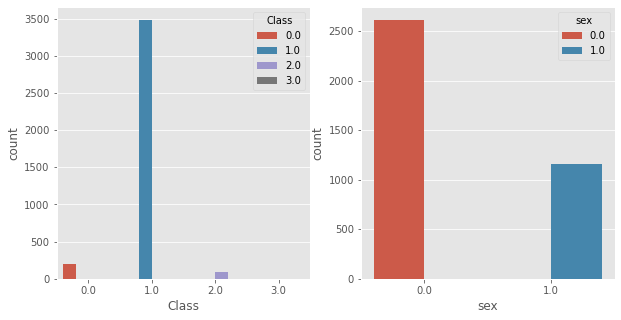

In [23]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot('Class', hue = 'Class', data = cleandata)

plt.subplot(1,2,2)
sns.countplot('sex', hue = 'sex', data = cleandata)

In [24]:
Data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

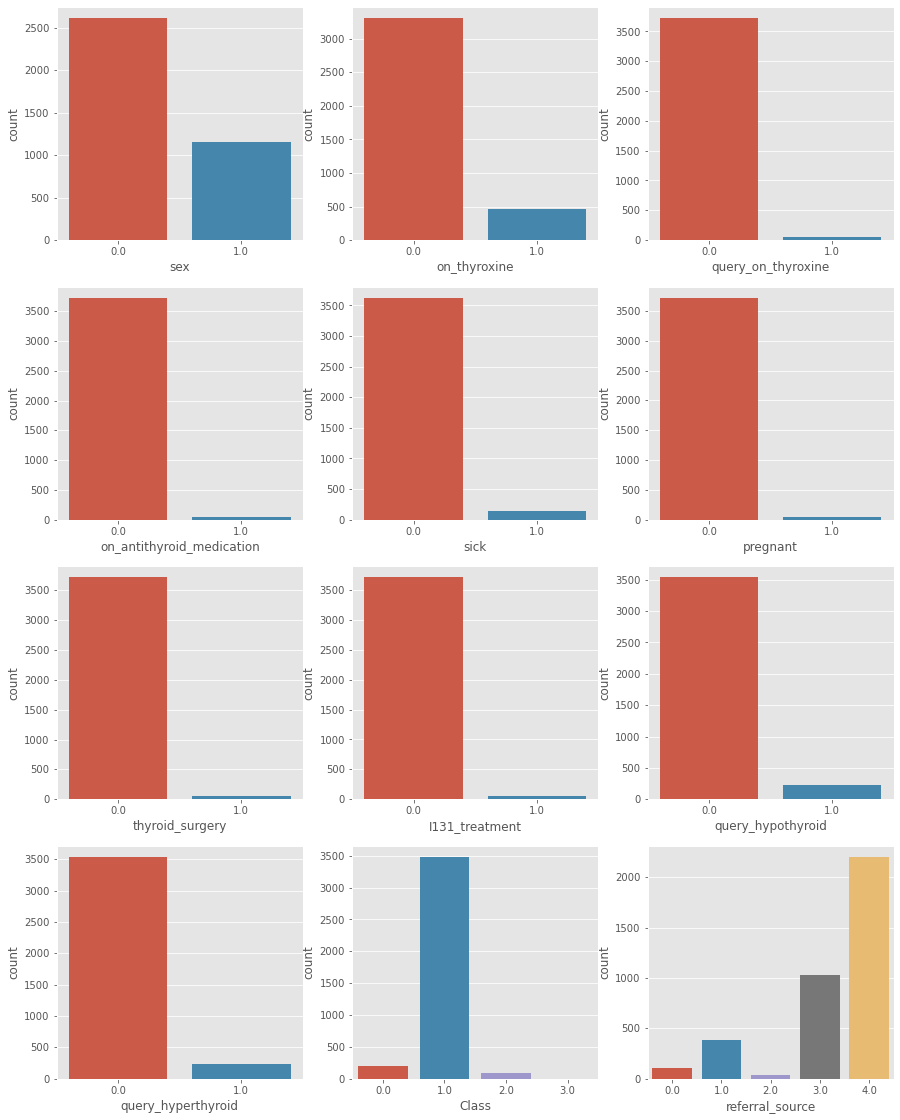

In [25]:
features = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'Class', 'referral_source']

plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(i[1], data = cleandata)   
# Using Bar plot we can see the mostly repeated part like more are female,most of person is not sick, etc.

### Histogram for continious variable.

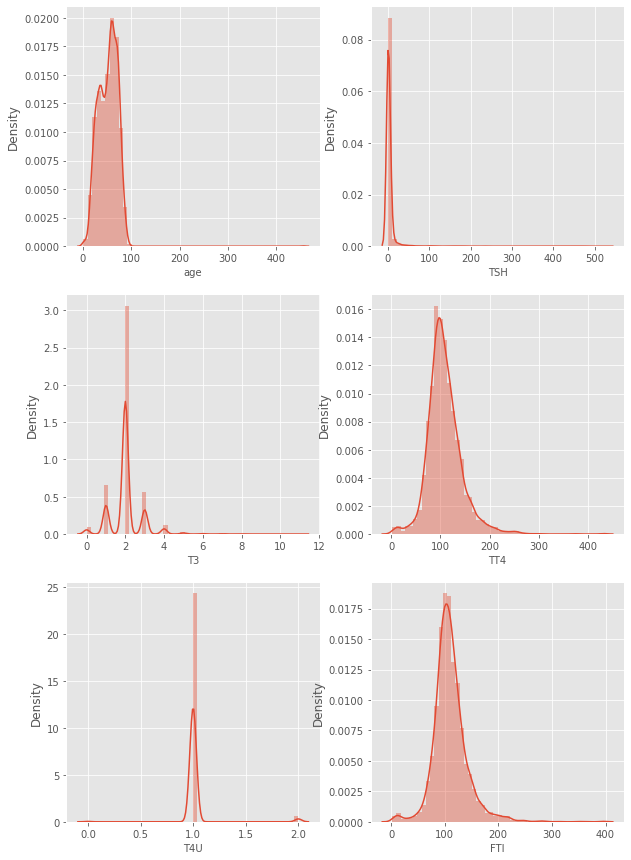

In [26]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(cleandata[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

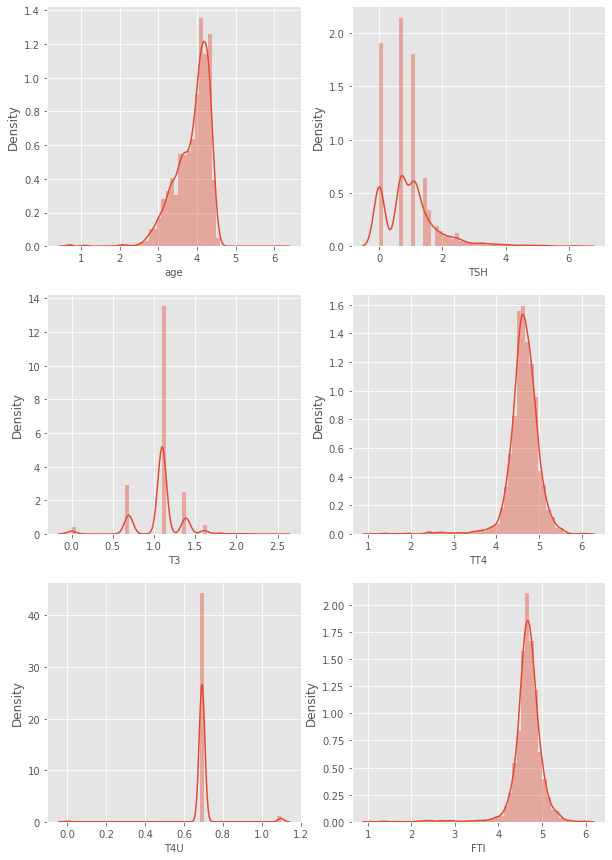

In [27]:
# Apply log transformation

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    cleandata[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(cleandata[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [28]:
cleandata = cleandata.drop(['TSH'],axis=1)

In [29]:
cleandata.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,1.0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,4.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,4.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,4.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,3.0,1.0


The datset is highly imbalanced. Let's balance it.

In [30]:
x = cleandata.drop(['Class'],axis=1)
y = cleandata['Class']

from imblearn.over_sampling import RandomOverSampler
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [31]:
x_sampled.shape

(13924, 21)

In [32]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,4.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,4.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,4.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,4.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,4.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,4.0
13922,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,4.0


<AxesSubplot:xlabel='Class', ylabel='count'>

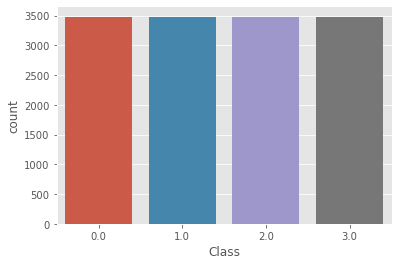

In [33]:
sns.countplot(y_sampled)    

# Build Model

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.30)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1084    0    0    0]
 [ 275  751   18    1]
 [   0    0 1011    0]
 [   0    0    0 1038]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1084
         1.0       1.00      0.72      0.84      1045
         2.0       0.98      1.00      0.99      1011
         3.0       1.00      1.00      1.00      1038

    accuracy                           0.93      4178
   macro avg       0.94      0.93      0.93      4178
weighted avg       0.94      0.93      0.93      4178

Accuracy: 0.9296314025849689


In [39]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 790  248   22   24]
 [ 332  692   11   10]
 [  15   44  931   21]
 [   0    0    0 1038]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      1084
         1.0       0.70      0.66      0.68      1045
         2.0       0.97      0.92      0.94      1011
         3.0       0.95      1.00      0.97      1038

    accuracy                           0.83      4178
   macro avg       0.83      0.83      0.83      4178
weighted avg       0.83      0.83      0.83      4178

Accuracy: 0.8259932982288176


In [41]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 840  222   22    0]
 [ 360  674   11    0]
 [   7   44  955    5]
 [   0    0    0 1038]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73      1084
         1.0       0.72      0.64      0.68      1045
         2.0       0.97      0.94      0.96      1011
         3.0       1.00      1.00      1.00      1038

    accuracy                           0.84      4178
   macro avg       0.84      0.84      0.84      4178
weighted avg       0.84      0.84      0.84      4178

Accuracy: 0.8393968405935854


In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 126   11  897   50]
 [  97   38  900   10]
 [   0    0  884  127]
 [   0    0    0 1038]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.12      0.19      1084
         1.0       0.78      0.04      0.07      1045
         2.0       0.33      0.87      0.48      1011
         3.0       0.85      1.00      0.92      1038

    accuracy                           0.50      4178
   macro avg       0.63      0.51      0.41      4178
weighted avg       0.63      0.50      0.41      4178

Accuracy: 0.4992819530876017


In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1084    0    0    0]
 [  74  964    7    0]
 [   0    0 1011    0]
 [   0    0    0 1038]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1084
         1.0       1.00      0.92      0.96      1045
         2.0       0.99      1.00      1.00      1011
         3.0       1.00      1.00      1.00      1038

    accuracy                           0.98      4178
   macro avg       0.98      0.98      0.98      4178
weighted avg       0.98      0.98      0.98      4178

Accuracy: 0.9806127333652466


Decision tree is work well with 98% accuracy...!!!

There is no need to optimise because they already have 98% accuracy.

In [47]:
x_sampled.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'referral_source'],
      dtype='object')

In [51]:
new_pred = clf.predict([[18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,34,65,54,0]])
new_pred

array([1.])

In [52]:
Data['Class'].unique()
# negative = 1,compensated_hypothyroid = 0,primary_hypothyroid = 2,secondary_hypothyroid = 3'

array([1, 0, 2, 3])

Save Model

In [53]:
import pickle
filename = 'finalized_model2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [54]:
import joblib
joblib.dump(clf, "finalized_model2.pkl")

['finalized_model2.pkl']

In [55]:
# load the model from disk
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9806127333652466


In [58]:
ls = [18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,34,65,54,1]
value = np.array(ls)
predictions = loaded_model.predict([value])
team = ''
if predictions[0] == 1:
    dis = 'Negative'
elif predictions[0] == 0:
    dis = 'Compensated_hypothyroid'
elif predictions[0] == 2:
    dis = 'Primary_hypothyroid'
else:
    dis = "secondary_hypothyroid"
print(dis)

Negative
